In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import os
from glob import glob

In [4]:
ROOT_DIR = r'C:\Users\jgmad\Research\Ibn'
DATA_DIR =  os.path.join(ROOT_DIR, "data")
probs_file, = glob(os.path.join(DATA_DIR, "sp_probs_early.csv"))
df = pd.read_csv(probs_file)

In [7]:
from sklearn.metrics import recall_score, precision_score
# Binary labels: 1 if Ibn, 0 otherwise
y_true = (df["true_class"] == "SN Ibn").astype(int)
y_pred = (df["pred_class"] == "SN Ibn").astype(int)
probs = df['SN Ibn'].values

y_pred = (probs >= 0.65).astype(int)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=["Non-Ibn", "Ibn"], digits=4)

cm, report

(array([[7738,   18],
        [  20,   10]]),
 '              precision    recall  f1-score   support\n\n     Non-Ibn     0.9974    0.9977    0.9976      7756\n         Ibn     0.3571    0.3333    0.3448        30\n\n    accuracy                         0.9951      7786\n   macro avg     0.6773    0.6655    0.6712      7786\nweighted avg     0.9950    0.9951    0.9950      7786\n')

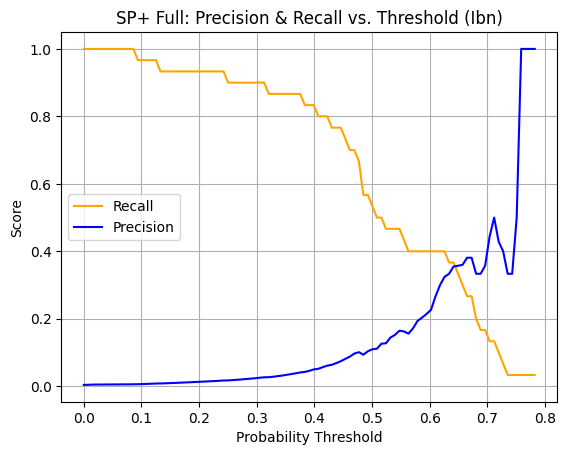

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score

# 1) Extract the Ibn‐class probability and build a binary true label
probs = df['SN Ibn'].values
y_true = (df['true_class'] == 'SN Ibn').astype(int)

# 2) Sweep a grid of thresholds and compute recall/precision
thresholds = np.linspace(0, max(probs), 101)
recalls = []
precisions = []

for t in thresholds:
    y_pred = (probs >= t).astype(int)
    recalls.append(recall_score(y_true, y_pred, zero_division=0))
    precisions.append(precision_score(y_true, y_pred, zero_division=0))

# 3) Plot
plt.figure()
plt.plot(thresholds, recalls, label='Recall',color='orange')
plt.plot(thresholds, precisions, label='Precision',color='blue')
plt.xlabel('Probability Threshold')
plt.ylabel('Score')
plt.title('SP+ Full: Precision & Recall vs. Threshold (Ibn)')
plt.legend()
plt.grid(True)
plt.show()
